In [11]:
from dataset import svhn_dataset, toPIL
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from train import train_model
import model
import numpy as np

# Load dataset

In [2]:
test_dataset = svhn_dataset("./data/SVHN/test",
                            transform=transforms.Compose(
                                [transforms.ToTensor(), 
                                 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                 ])
                            )

train_dataset = svhn_dataset("./data/SVHN/train",
                             transform=transforms.Compose(
                                 [toPIL(),
                                  transforms.RandomChoice(
                                      [transforms.ColorJitter(brightness=[0.5,0.8],
                                                              contrast=[0.4,0.5],
                                                              saturation=[0,1]),
                                       transforms.RandomRotation(degrees=30)]),
                                  transforms.ColorJitter(hue=[-0.5,0.5]),
                                  transforms.ToTensor(),
                                  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                  ])
                             )

extra_dataset = svhn_dataset("./data/SVHN/extra",
                             transform=transforms.Compose(
                                 [transforms.ToTensor(),
                                  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                  ])
                             )


loading data from ./data/SVHN/test
loading data from ./data/SVHN/train
loading data from ./data/SVHN/extra


In [3]:
train_loader = DataLoader(train_dataset, batch_size = 256, num_workers = 0, shuffle = True, drop_last = True)
validation_loader = DataLoader(test_dataset, batch_size = 256, num_workers = 0, shuffle = True, drop_last = True)
test_loader = DataLoader(extra_dataset, batch_size = 128, num_workers = 0, shuffle = True, drop_last = True)

In [4]:
print("training set has {} batches ".format(len(train_loader)))
print("validation set has {} batches ".format(len(validation_loader)))
print("test set has {} batches ".format(len(test_loader)))

training set has 130 batches 
validation set has 51 batches 
test set has 1580 batches 


## Plot a random image

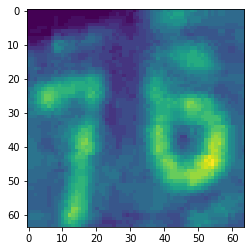

In [5]:
rnd = random.randint(0,10000)
image = train_dataset[rnd]["image"]
plt.figure()
plt.imshow(image.permute(1,2,0)[:,:,0])

# Train the model

In [6]:
# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

scratch_model = model.vgg11_bn()

# Print the model we just instantiated
# print(scratch_model)

#params_to_update = scratch_model.parameters()
#print("Params to learn:")

#for name,param in scratch_model.named_parameters():
#    if param.requires_grad == True:
#        print("\t",name)

dataloaders_dict = {"train":train_loader,"val":validation_loader}
scratch_model = scratch_model.to(device)
scratch_optimizer = optim.Adam(scratch_model.parameters(), lr=0.0001)
scratch_criterion = nn.CrossEntropyLoss()
best_model, scratch_hist = train_model(scratch_model, dataloaders_dict, scratch_criterion, scratch_optimizer, device, num_epochs=150)


Epoch 0/149
----------
train Loss: 1.1805 Acc: 0.5890
Predicciones tensor([10, 10, 10,  3,  5], device='cuda:0')
Real ....... tensor([10, 10, 10,  1,  0], device='cuda:0')
val Loss: 0.9882 Acc: 0.6409

Epoch 1/149
----------
train Loss: 1.0208 Acc: 0.6410
Predicciones tensor([10, 10, 10,  2,  1], device='cuda:0')
Real ....... tensor([10, 10, 10,  2,  0], device='cuda:0')
val Loss: 0.7983 Acc: 0.7276

Epoch 2/149
----------
train Loss: 0.7664 Acc: 0.7346
Predicciones tensor([10, 10,  1,  2,  0], device='cuda:0')
Real ....... tensor([10, 10,  1,  3,  7], device='cuda:0')
val Loss: 0.4848 Acc: 0.8360

Epoch 3/149
----------
train Loss: 0.5466 Acc: 0.8136
Predicciones tensor([10, 10, 10, 10,  2], device='cuda:0')
Real ....... tensor([10, 10, 10, 10,  2], device='cuda:0')
val Loss: 0.3609 Acc: 0.8839

Epoch 4/149
----------
train Loss: 0.4185 Acc: 0.8599
Predicciones tensor([10, 10, 10,  5,  8], device='cuda:0')
Real ....... tensor([10, 10, 10,  5,  8], device='cuda:0')
val Loss: 0.2922 Acc

val Loss: 0.2004 Acc: 0.9598

Epoch 41/149
----------
train Loss: 0.0366 Acc: 0.9844
Predicciones tensor([10, 10, 10,  2,  5], device='cuda:0')
Real ....... tensor([10, 10, 10,  2,  5], device='cuda:0')
val Loss: 0.2037 Acc: 0.9588

Epoch 42/149
----------
train Loss: 0.0358 Acc: 0.9846
Predicciones tensor([10, 10,  1,  3,  1], device='cuda:0')
Real ....... tensor([10, 10,  1,  3,  1], device='cuda:0')
val Loss: 0.2166 Acc: 0.9569

Epoch 43/149
----------
train Loss: 0.0352 Acc: 0.9848
Predicciones tensor([10, 10, 10, 10,  6], device='cuda:0')
Real ....... tensor([10, 10, 10, 10,  6], device='cuda:0')
val Loss: 0.2429 Acc: 0.9532

Epoch 44/149
----------
train Loss: 0.0346 Acc: 0.9852
Predicciones tensor([10, 10, 10,  7,  2], device='cuda:0')
Real ....... tensor([10, 10, 10,  7,  2], device='cuda:0')
val Loss: 0.2104 Acc: 0.9581

Epoch 45/149
----------
train Loss: 0.0339 Acc: 0.9852
Predicciones tensor([10, 10,  1,  1,  1], device='cuda:0')
Real ....... tensor([10, 10,  1,  1,  1], de

Predicciones tensor([10, 10, 10,  4,  2], device='cuda:0')
Real ....... tensor([10, 10, 10,  4,  2], device='cuda:0')
val Loss: 0.2576 Acc: 0.9600

Epoch 82/149
----------
train Loss: 0.0173 Acc: 0.9910
Predicciones tensor([10, 10, 10,  1,  5], device='cuda:0')
Real ....... tensor([10, 10, 10,  1,  5], device='cuda:0')
val Loss: 0.2474 Acc: 0.9603

Epoch 83/149
----------
train Loss: 0.0159 Acc: 0.9913
Predicciones tensor([10, 10,  1,  4,  3], device='cuda:0')
Real ....... tensor([10, 10,  1,  4,  3], device='cuda:0')
val Loss: 0.2544 Acc: 0.9594

Epoch 84/149
----------
train Loss: 0.0152 Acc: 0.9914
Predicciones tensor([10, 10,  1,  5,  0], device='cuda:0')
Real ....... tensor([10, 10,  1,  5,  0], device='cuda:0')
val Loss: 0.2513 Acc: 0.9608

Epoch 85/149
----------
train Loss: 0.0166 Acc: 0.9909
Predicciones tensor([10, 10, 10,  3,  3], device='cuda:0')
Real ....... tensor([10, 10, 10,  3,  3], device='cuda:0')
val Loss: 0.2798 Acc: 0.9584

Epoch 86/149
----------
train Loss: 0.01

val Loss: 0.2776 Acc: 0.9598

Epoch 122/149
----------
train Loss: 0.0119 Acc: 0.9927
Predicciones tensor([10, 10, 10, 10,  8], device='cuda:0')
Real ....... tensor([10, 10, 10, 10,  8], device='cuda:0')
val Loss: 0.2665 Acc: 0.9613

Epoch 123/149
----------
train Loss: 0.0107 Acc: 0.9928
Predicciones tensor([10, 10, 10,  1,  2], device='cuda:0')
Real ....... tensor([10, 10, 10,  1,  9], device='cuda:0')
val Loss: 0.2941 Acc: 0.9595

Epoch 124/149
----------
train Loss: 0.0108 Acc: 0.9928
Predicciones tensor([10, 10, 10,  1,  2], device='cuda:0')
Real ....... tensor([10, 10, 10,  1,  2], device='cuda:0')
val Loss: 0.2947 Acc: 0.9603

Epoch 125/149
----------
train Loss: 0.0106 Acc: 0.9929
Predicciones tensor([10, 10, 10,  4,  6], device='cuda:0')
Real ....... tensor([10, 10, 10,  4,  6], device='cuda:0')
val Loss: 0.2731 Acc: 0.9618

Epoch 126/149
----------
train Loss: 0.0110 Acc: 0.9927
Predicciones tensor([10, 10, 10,  2,  9], device='cuda:0')
Real ....... tensor([10, 10, 10,  2,  9

## Save trained model

In [7]:
PATH = './best_model.pth'
torch.save(best_model.state_dict(), PATH)

## Load model and test it with extra dataset

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
PATH = './best_model.pth'
trained_model = model.vgg11_bn()
trained_model = trained_model.to(device)
trained_model.load_state_dict(torch.load(PATH))
trained_model.eval()
correctos = 0.0
incorrectos = 0
total_imagenes = 0
for i, data in enumerate(test_loader,0):
    image = data["image"].to(device, dtype=torch.float)
    label = data["labels"].to(device, dtype=torch.long)
    totalbatch = len(image)
    total_imagenes += totalbatch
    out = trained_model(image)
    _,preds = torch.max(out, 1)
    cor = preds.eq(label).sum()
    correctos += cor
    incorrectos += totalbatch*5 - (cor)
    
print(correctos, incorrectos, total_imagenes)
x = ((correctos.item())/(total_imagenes*5))*100
print("accuracy {}%".format(x))

tensor(936273, device='cuda:0') tensor(74927, device='cuda:0') 202240
accuracy 92.59028876582278%


## Plot Validation Accuracy vs. Number of Training Epochs

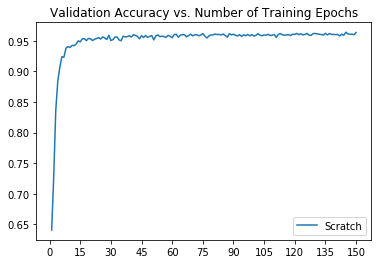

In [12]:
plt.title("Validation Accuracy vs. Number of Training Epochs")
shist = [h.cpu().numpy() for h in scratch_hist]
plt.plot(range(1,150+1),shist,label="Scratch")
plt.xticks(np.arange(0, 151, 15.0))
plt.legend()
plt.show()